In [236]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import figure

In [237]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter
import numpy as np
from scipy.optimize import curve_fit

figure_width = 18.  # cm
figure_height = 20. # cm

def find_error_2_measurements(y_array, const_error, student_const):
    """
    Finds array of errors calculation based on Student destribution, const_error = smallest value of measurement scale
    """
    mean = np.array([np.mean(i) for i in y_array.T])
    deltas_array = np.array([np.sqrt(np.sum(np.abs([(j-mean[count])**2 for j in i]))/(((y_array[0]).size)*(((y_array[0]).size)-1))) for count, i in enumerate(y_array.T)])
    num = student_const*deltas_array
    print(f"My data is: {num*500}")
    return num + const_error

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def func(x, A, B, bias, omega):
    return sigmoid((x)+bias)*A*x + (1-sigmoid((x)+bias))*B*x

def draw_graph(width, height, x, y, x_axis, y_axis, name, graph_name, student_const=2.35, margins_array=[2, 1, 2, 2], x_mod=1, y_mod=1, 
    max_y=None, min_y=None, approximation_function=None, other_function=None, min_x=None):
    """
    PARAMETERS DESCRIPTION:
        width - GRAPH WIDTH IN CM
        height - GRAPH HEIGHT IN CM
        x - X AXIS DATA
        y - Y AXIS DATA
        graph_name - NAME OF GRAPH TO SAVE WITH
        margins_array - ARRAY OF MARGINS (LEFT, RIGHT, TOP, BOTTOM) IN CM
        min_y - BOTTOM LIMIT GRAPH BY Y AXIS, IF NONE - MAKE 0
        max_y - TOP LIMIT GRAPH BY Y AXIS, IF NONE - MAKE 1.1*MAX(Y)
        x_axis - NAME OF X_AXIS
        y_axis - NAME OF Y_AXIS
        name - NAME OF GRAPH LOCATED BY IT'S TOP
        x_mod - VALUE THAT WE SHOULD MULTIPLY DATA IN X AXIS TO
        y_mod - VALUE THAT WE SHOULD MULTIPLE DATA IN Y AXIS TO
    """
    if min_y is None:
        min_y = 0
    if max_y is None:
        max_y = 1.1*np.max(y)
    
    _fontsize = 15

    DP = 2

    left_margin, right_margin, top_margin, bottom_margin = margins_array

    box_width = left_margin + width + right_margin   # cm
    box_height = top_margin + height + bottom_margin # cm

    cm2inch = 1/2.54 # inch per cm

    fig = plt.figure(figsize=(box_width*cm2inch,box_height*cm2inch), dpi=120, facecolor='w', edgecolor='k')
    ##fig = plt.figure()
    fig.canvas.draw()
    ax = plt.gca()

    x_mod_base10 = 0 if np.log10(x_mod)>=1 else round(np.log10(x_mod))
    y_mod_base10 = 0 if np.log10(y_mod)>=1 else round(np.log10(y_mod))
    # make lambda formatters
    y_formatter = lambda y, pos: f"{y*y_mod:.{y_mod_base10}f}"
    x_formatter = lambda x, pos: f"{x*x_mod:.{x_mod_base10}f}"

    # set up axis
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # find errors and middle value
    error_values = find_error_2_measurements(y, 0.1, student_const)
    mid_y = [np.sum(i)/(y.T)[0].size for i in y.T]
    print(mid_y)

    # draw points
    ax.scatter(x, mid_y, c='red', label="Измерянные значения")

    # draw errors
    ax.plot([x[0], x[0]], [mid_y[0]-error_values[0], mid_y[0]+error_values[0]], linewidth=0.5, c='blue', linestyle="-", label='Доверительный интервал')
    for c, (i, j) in enumerate(zip(x, error_values)):
        ax.plot([i, i], [mid_y[c]-j, mid_y[c]+j], linewidth=0.5, c='blue', linestyle="-")
        ax.plot([i-0.05, i+0.05], [mid_y[c]-j, mid_y[c]-j], linewidth=0.5, c='blue', linestyle="-")
        ax.plot([i-0.05, i+0.05], [mid_y[c]+j, mid_y[c]+j], linewidth=0.5, c='blue', linestyle="-")

    # draw approximating function
    if approximation_function is not None:
        if min_x is None:
            x_array = np.linspace(np.min(x), np.max(x), 1000)
        else:
            x_array = np.linspace(min_x, np.max(x), 1000)
        popt, _ = curve_fit(approximation_function, x, mid_y)
        print(popt)    
        ax.plot(x_array, approximation_function(x_array, *popt), c='black', linewidth=3, label="Аппроксимированная зависимость")
        ax.plot(x_array, popt[1]*x_array, c='purple', linewidth=1, linestyle='--', label="Первое сопротивление")
        ax.plot(x_array, popt[0]*x_array, c='magenta', linewidth=1, linestyle='--', label="Второе сопротивление")

    if other_function is not None:
        ax.plot(np.linspace(x[0], x[6], 1000), other_function(np.linspace(x[0], x[6], 1000)), linewidth=1, c='green', linestyle="--")
    #set bounds
    ax.set_ybound(min_y, max_y)
    ax.set_xbound(0, 1.1*np.max(x))

    #set axis names
    plt.xlabel(x_axis, weight='bold', fontsize=14)
    plt.ylabel(y_axis, weight='bold', fontsize=14)

    #make graph name
    plt.title(name, weight='bold', fontsize=14)

    ## THIS IS THE EDIT
    ax.xaxis.set_major_locator(MultipleLocator(1/4))
    ax.yaxis.set_major_locator(MultipleLocator(1/4))
    ax.xaxis.grid(True,'major',linewidth=2/DP,linestyle='-',color='#d7d7d7',zorder=0)
    ax.yaxis.grid(True,'major',linewidth=2/DP,linestyle='-',color='#d7d7d7')

    ax.xaxis.set_minor_locator(MultipleLocator((1/4)/5))
    ax.yaxis.set_minor_locator(MultipleLocator((1/4)/5))
    ax.xaxis.grid(True,'minor', linewidth=0.5/DP, linestyle='-', color='#d7d7d7')
    ax.yaxis.grid(True,'minor', linewidth=0.5/DP, linestyle='-', color='#d7d7d7')

    ax.set_axisbelow(True)
    ax.set_aspect('equal')

    ##ax.axhline(linewidth=0)
    ##ax.axvline(linewidth=0)

    ax.xaxis.set_major_formatter(FuncFormatter(x_formatter))
    xticks = ax.xaxis.get_major_ticks()
    for i,l in enumerate(xticks):
        if not (i - 1) % 4 == 0:
            xticks[i].label1.set_visible(False)
        else:
            xticks[i].label1.set_fontsize(_fontsize)

    ax.yaxis.set_major_formatter(FuncFormatter(y_formatter))
    yticks = ax.yaxis.get_major_ticks()
    for i,l in enumerate(yticks):
        if not (i - 1) % 4 == 0:
            yticks[i].label1.set_visible(False)
        else:
            yticks[i].label1.set_fontsize(_fontsize)    
    
    #figManager.window.showMaximized()
    fig.subplots_adjust(left   = left_margin / box_width,
                        bottom = bottom_margin / box_height,
                        right  = 1. - right_margin / box_width,
                        top    = 1. - top_margin   / box_height,
                        )
    plt.legend()
    plt.savefig(f'{graph_name}.jpg', format='jpg', dpi=120)
    plt.show()

In [238]:
current_1 = np.array([10, 25, 38, 50, 63, 75, 83, 93, 97, 100, 105, 105, 108, 105, 105, 105, 100, 100, 100, 98, 95, 95, 93, 93, 93, 90, 88, 85, 85, 88, 93, 93, 93, 95, 98])
current_2 = np.array([10, 25, 40, 50, 63, 73, 83, 90, 98, 103, 105, 108, 108, 105, 105, 100, 103, 100, 98,  98, 98, 95, 93, 93, 90, 88, 88, 88, 85, 88, 90, 90, 93, 95, 98])
current_3 = np.array([10, 23, 35, 48, 65, 73, 80, 90, 98, 103, 105, 105, 105, 108, 105, 103, 100, 100, 98,  95, 95, 93, 93, 90, 90, 88, 85, 85, 85, 88, 90, 93, 93, 95, 98])
voltage = np.array([0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 6.4, 6.6, 6.8, 7])

My data is: [3.27495433e-15 2.22489102e+00 4.84903756e+00 2.22489102e+00
 2.22489102e+00 2.22489102e+00 3.33733653e+00 3.33733653e+00
 1.11244551e+00 3.33733653e+00 0.00000000e+00 3.33733653e+00
 3.33733653e+00 3.33733653e+00 0.00000000e+00 4.84903756e+00
 3.33733653e+00 0.00000000e+00 2.22489102e+00 3.33733653e+00
 3.33733653e+00 2.22489102e+00 0.00000000e+00 3.33733653e+00
 3.33733653e+00 2.22489102e+00 3.33733653e+00 3.33733653e+00
 0.00000000e+00 0.00000000e+00 3.33733653e+00 3.33733653e+00
 0.00000000e+00 2.61996346e-14 0.00000000e+00]
[0.4000000000000001, 0.9733333333333333, 1.5066666666666666, 1.9733333333333334, 2.546666666666667, 2.9466666666666668, 3.28, 3.64, 3.9066666666666663, 4.080000000000001, 4.2, 4.239999999999999, 4.28, 4.24, 4.2, 4.1066666666666665, 4.04, 4.0, 3.9466666666666668, 3.8800000000000003, 3.84, 3.7733333333333334, 3.72, 3.68, 3.64, 3.546666666666667, 3.48, 3.44, 3.4, 3.52, 3.64, 3.68, 3.72, 3.7999999999999994, 3.92]


C:\Users\Arseny\AppData\Local\Temp\ipykernel_9296\3671487125.py:20: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Arseny\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[ 0.52843726  2.94093513 -2.47442566  1.        ]


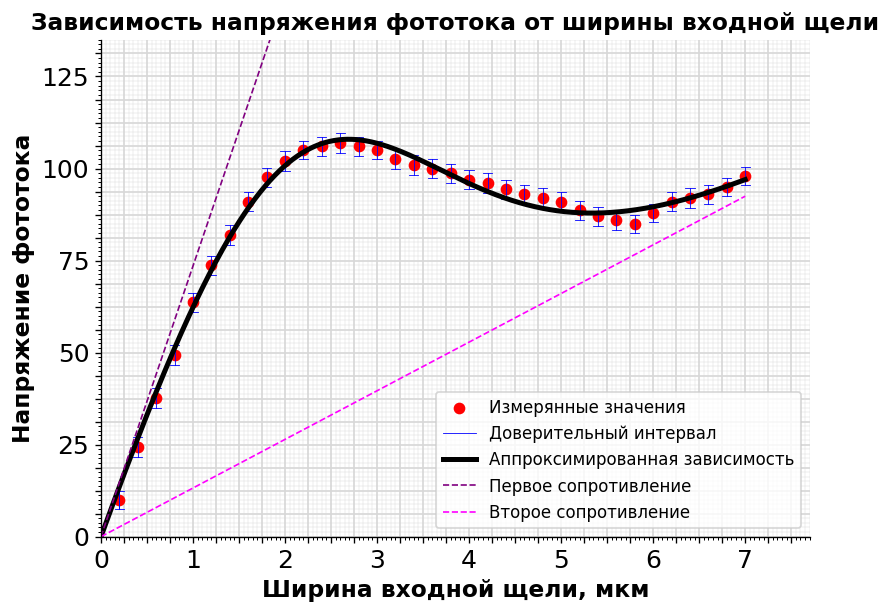

In [239]:
figure_width = 15.  # cm
figure_height = 22. # cm
draw_graph(figure_width, figure_height, voltage, np.array([current_1/25, current_2/25, current_3/25]), "Ширина входной щели, мкм", r"Напряжение фототока", 
    "Зависимость напряжения фототока от ширины входной щели", "Lab_5", margins_array=[5, 4, 3, 3], y_mod=25, max_y=1.25*np.max(current_1/25), 
    approximation_function=func, min_x=0)